# Pathrise_Regression

How long will it take the fellow to be placed?

### Import All Necessary Packeges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVC,SVR
from sklearn import tree
from sklearn.metrics import mean_absolute_error,mean_squared_error
import pickle

### Reading the Preprocessed Dataset 

In [2]:
df=pd.read_csv('Pathrise_Preprocessed_Data.csv')

In [3]:
df_reg=df[df['placed']==1]

In [4]:
df_reg=df_reg.drop('placed',axis=1)

### Target Histogram

<AxesSubplot:xlabel='program_duration_days', ylabel='Count'>

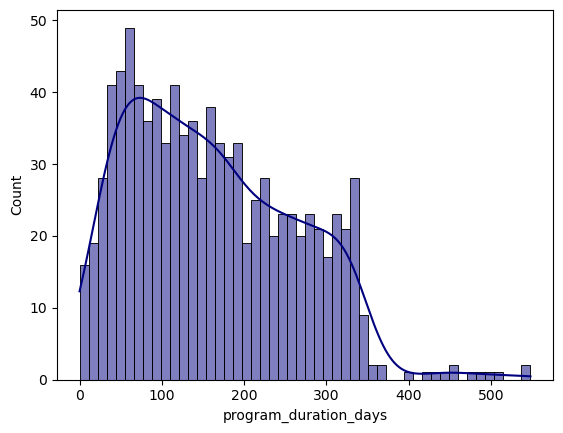

In [5]:
sns.histplot(data=df_reg,x='program_duration_days',bins=50,kde=True,color='navy')


### Dropping the Target 

In [6]:
X=df_reg.drop('program_duration_days',axis=1)
Y=df_reg['program_duration_days']

### Standardizing Values

The inconsistency in the order of variables can lead to errors in machine prediction. To address this issue, the StandardScaler method is employed for standardizing the independent variables. This ensures that all variables undergo a transformation where they have a mean of zero and a standard deviation of one.

In [7]:
transform=preprocessing.StandardScaler()
X_scaled=transform.fit_transform(X)

In [8]:
col=X.columns
X=pd.DataFrame(X_scaled,columns=col)

## Modeling

### Splitting Data

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

### Selecting Machine Learning Models

We will use three models of machine learning,which include:     
1.Linear Regression     
2.Support vector Regression     
3.Descision Tree Regression

In [10]:
LREG=LinearRegression()
SVR=SVR(kernel='poly',degree=3,C=0.1)
DTR=tree.DecisionTreeRegressor(max_depth=2)
model=[LREG,SVR,DTR]
list_model_name={LREG:'Linear Regression',SVR:'Support vector Regression',DTR:'Descision Tree Regression'}

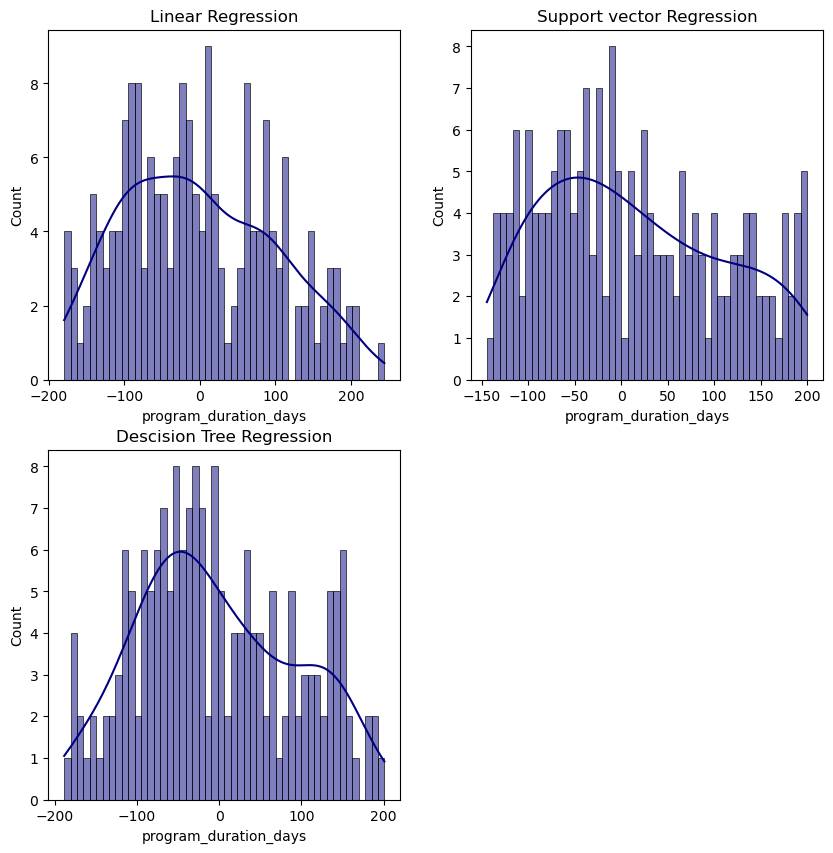

In [11]:
metrics={}
plt.figure(figsize=(10,10))
for i,m in enumerate(model):
    m.fit(X_train,Y_train)
    Y_pred=m.predict(X_test)
    metrics[list_model_name[m]]={'MAE':mean_absolute_error(Y_test,Y_pred),'MSE':mean_squared_error(Y_test,Y_pred),'RMSE':np.sqrt(mean_squared_error(Y_test,Y_pred))}
    plt.subplot(2,2,i+1)
    residual=Y_test-Y_pred
    sns.histplot(x=residual,bins=50,kde=True,color='navy')
    plt.title(list_model_name[m])
    

### Performance Metrics

In [12]:
df_reg_err=np.round(pd.DataFrame(metrics),1)
df_reg_err

,Linear Regression,Support vector Regression,Descision Tree Regression
MAE,83.3,80.5,79.1
MSE,9917.6,9253.4,8866.1
RMSE,99.6,96.2,94.2


### Exporting the Best Model

In [13]:
pickle.dump(tree.DecisionTreeRegressor,open('Pathrise_Regression.pk1','wb'))